### IMDB映画レビューデータセットを準備します

In [63]:
import string

In [64]:
import os

In [65]:
import nltk 
import numpy as np
import pandas as pd 

In [66]:
pwd

'/Users/shinoda/diveintocode-ml/ML2001_sprint'

In [67]:
# IMDBをカレントフォルダにダウンロード
#!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [68]:
# 解凍
#!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
#!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
#!cat aclImdb/README

In [69]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [70]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [71]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

a  bad  film  good  is  movie  this  very
0  0    0     0     1   1      1     1     1
1  1    0     1     1   1      0     1     0
2  0    2     0     0   0      0     0     3

In [113]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

a good  bad very  film is  is a  is very  movie is  this film  this movie  \
0       0         0        0     0        1         1          0           1   
1       1         0        1     1        0         0          1           0   
2       0         1        0     0        0         0          0           0   

   very bad  very good  very very  
0         0          1          0  
1         0          0          0  
2         2          0          1

# 【問題1】BoWのスクラッチ実装

以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie

In [74]:
Bow_dataset = \
["This movie is SOOOO funny!!!",
  "What a movie!",
  "I never best movie ever!!!!! this movie is"]

In [13]:
Bow_dataset[0]

'This movie is SOOOO funny!!!'

In [14]:
Bow_dataset[0].split(' ')

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
Bow_dataset[0]= Bow_dataset[0].replace('[{}]'.format(string.punctuation), '')

In [17]:
Bow_dataset[0]= Bow_dataset[0].replace('!', '')

In [18]:
Bow_dataset[0].split(' ')

['This', 'movie', 'is', 'SOOOO', 'funny']

In [19]:
len(Bow_dataset)

3

In [134]:
new_Bow_dataset = []
for i in (Bow_dataset):
    ne = i.replace('!', '').split(' ')
    for m in ne:
        new_Bow_dataset.append(m)
        
new_Bow_dataset = set(new_Bow_dataset)
print(new_Bow_dataset)

new_Bow_dataset_num = np.zeros(len(new_Bow_dataset))


    
    

{'best', 'funny', 'This', 'never', 'ever', 'movie', 'What', 'SOOOO', 'this', 'is', 'a', 'I'}


In [135]:
adr_dict = dict(zip(new_Bow_dataset, new_Bow_dataset_num))

In [143]:
adr_dict

{'best': 0.0,
 'funny': 0.0,
 'This': 0.0,
 'never': 0.0,
 'ever': 0.0,
 'movie': 0.0,
 'What': 0.0,
 'SOOOO': 0.0,
 'this': 0.0,
 'is': 0.0,
 'a': 0.0,
 'I': 0.0}

In [137]:
df_ = pd.DataFrame(adr_dict,index=['i',])
df_ 

best  funny  This  never  ever  movie  What  SOOOO  this   is    a    I
i   0.0    0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0  0.0  0.0  0.0

In [140]:
import collections

l = ['a', 'a', 'a', 'a', 'b', 'c', 'c']
c = collections.Counter(new_Bow_dataset)

c

Counter({'best': 1,
         'funny': 1,
         'This': 1,
         'never': 1,
         'ever': 1,
         'movie': 1,
         'What': 1,
         'SOOOO': 1,
         'this': 1,
         'is': 1,
         'a': 1,
         'I': 1})

In [141]:
s = 'government of the people, by the people, for the people.'

s_remove = s.replace(',', '').replace('.', '')

print(s_remove)
# government of the people by the people for the people

word_list = s_remove.split()

print(word_list)
# ['government', 'of', 'the', 'people', 'by', 'the', 'people', 'for', 'the', 'people']

government of the people by the people for the people
['government', 'of', 'the', 'people', 'by', 'the', 'people', 'for', 'the', 'people']


In [23]:
dataset1= Bow_dataset
dataset1

['This movie is SOOOO funny',
 'What a movie!',
 'I never best movie ever!!!!! this movie is']

In [41]:
def make_word(sentence):
    sentence = sentence.replace(",", "").replace(".", "").replace("!", "").replace('"', '').replace("<br />", "").replace("/", " and ").lower()
    return sentence.split(" ")

In [46]:
def scratch_BoW(dataset, n=1):
    df = pd.DataFrame(index=range(len(dataset)))
    for i, data in enumerate(dataset):
        word_list0 = make_word(data)
        word_list = [" ".join(word_list0[i:i+n]) for i in range(len(word_list0) - (n-1))]
        for word in word_list:
            if word not in df.columns:
                df[word] = 0
            df.loc[i, word] += 1
    df_s = df.sort_index(axis=1)
    return df_s
#メモenumerateでインデックス

In [47]:
scratch_BoW(dataset1)

a movie  best movie  ever this  i never  is soooo  movie ever  movie is  \
0        0           0          0        0         1           0         1   
1        1           0          0        0         0           0         0   
2        0           1          1        1         0           1         1   

   never best  soooo funny  this movie  what a  
0           0            1           1       0  
1           0            0           0       1  
2           1            0           1       0

In [44]:
# n= 1
# df = pd.DataFrame(index=range(len(dataset1)))
# for i, data in enumerate(dataset1):
#     word_list0 = make_word(data)
#     #word_list = [" ".join(word_list0[i:i+n]) for i in range(len(word_list0) - (n-1))]
#     for word in word_list0:
#         if word not in df.columns:
#             df[word] = 0
#             print(df)
#         print(df.columns)
#         df.loc[i, word] += 1#i=0,1,2
#         print(df)

### 2-gram

In [51]:
def scratch_BoW(dataset, n=2):
    df = pd.DataFrame(index=range(len(dataset)))
    for i, data in enumerate(dataset):
        word_list0 = make_word(data)
        word_list = [" ".join(word_list0[i:i+n]) for i in range(len(word_list0) - (n-1))]#word_list0から2つ
        print(word_list)
        for word in word_list:
            if word not in df.columns:
                df[word] = 0
            df.loc[i, word] += 1
    df_s = df.sort_index(axis=1)
    return df_s

In [52]:
dataset1

['This movie is SOOOO funny',
 'What a movie!',
 'I never best movie ever!!!!! this movie is']

In [53]:
scratch_BoW(dataset1)

['this movie', 'movie is', 'is soooo', 'soooo funny']
['what a', 'a movie']
['i never', 'never best', 'best movie', 'movie ever', 'ever this', 'this movie', 'movie is']


a movie  best movie  ever this  i never  is soooo  movie ever  movie is  \
0        0           0          0        0         1           0         1   
1        1           0          0        0         0           0         0   
2        0           1          1        1         0           1         1   

   never best  soooo funny  this movie  what a  
0           0            1           1       0  
1           0            0           0       1  
2           1            0           1       0

In [54]:
test = ["1","2","3","4"]

In [57]:
test

['1', '2', '3', '4']

In [60]:
test_join = " ".join(test[0:3])

In [61]:
test_join

'1 2 3'

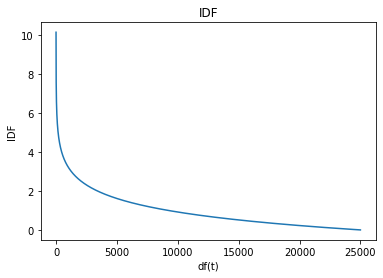

In [75]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()


In [131]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shinoda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

bad  good  is  this  very
0    0     1   1     1     1
1    0     1   1     1     0
2    2     0   0     0     3

# 【問題2】TF-IDFの計算

IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation

sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation



In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b',max_features=5000)
vectorizer.fit(x_train)
tf_train = (vectorizer.transform(x_train)).toarray()
tf_test = (vectorizer.transform(x_test)).toarray()
df_train = pd.DataFrame(tf_train, columns=vectorizer.get_feature_names())
display(df_train)

0   00  000         1        10       100   11   12   13  13th  ...  \
0      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
1      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
2      0.0  0.0  0.0  0.000000  0.124442  0.000000  0.0  0.0  0.0   0.0  ...   
3      0.0  0.0  0.0  0.000000  0.085006  0.000000  0.0  0.0  0.0   0.0  ...   
4      0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
...    ...  ...  ...       ...       ...       ...  ...  ...  ...   ...  ...   
24995  0.0  0.0  0.0  0.000000  0.000000  0.052273  0.0  0.0  0.0   0.0  ...   
24996  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
24997  0.0  0.0  0.0  0.000000  0.068246  0.000000  0.0  0.0  0.0   0.0  ...   
24998  0.0  0.0  0.0  0.101521  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   
24999  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0   0.0  ...   

           york     young  younger  youth    z      zero  zizek  zombie  \
0      0.000000  0.164505      0.0    0.0  0.0  0.136932    0.0     0.0   
1      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
2      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
3      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
4      0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
...         ...       ...      ...    ...  ...       ...    ...     ...   
24995  0.095763  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24996  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24997  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24998  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   
24999  0.000000  0.000000      0.0    0.0  0.0  0.000000    0.0     0.0   

       zombies  zone  
0          0.0   0.0  
1          0.0   0.0  
2          0.0   0.0  
3          0.0   0.0  
4          0.0   0.0  
...        ...   ...  
24995      0.0   0.0  
24996      0.0   0.0  
24997      0.0   0.0  
24998      0.0   0.0  
24999      0.0   0.0  

[25000 rows x 5000 columns]

In [79]:
df_test = pd.DataFrame(tf_test, columns=vectorizer.get_feature_names())
display(df_test)

0   00  000    1   10  100   11   12   13  13th  ...  york  young  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...    ...   
24995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
24996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
24997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
24998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   
24999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0   

       younger  youth    z  zero  zizek  zombie  zombies  zone  
0          0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
1          0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
2          0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
3          0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
4          0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
...        ...    ...  ...   ...    ...     ...      ...   ...  
24995      0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
24996      0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
24997      0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
24998      0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  
24999      0.0    0.0  0.0   0.0    0.0     0.0      0.0   0.0  

[25000 rows x 5000 columns]

# 【問題3】TF-IDFを用いた学習

問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。



In [80]:
import xgboost as xg

In [81]:
xgclass = xg.XGBClassifier()

In [82]:
xgclass.fit(tf_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
y_pred = xgclass.predict(tf_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [86]:
print("正解率:{}".format(xgclass.score(tf_test, y_test)))

正解率:0.81256


In [87]:
from sklearn.metrics import precision_score

In [88]:
print("適合率:{}".format(precision_score(y_test,y_pred)))

適合率:0.7780387133504127


# 【問題4】TF-IDFのスクラッチ実装

以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

This movie is SOOOO funny!!! 

What a movie! I never

best movie ever!!!!! this movie

#  標準

In [90]:
# 標準
def tf_idf_st(data):
    data_sum = data.sum(axis=1).reshape(len(data), 1)
    tf = data / data_sum    
    smp = data.shape[0]
    data_T = (data > 0)
    data_T = data_T.sum(axis=0)
    idf = np.log(smp / data_T)
    tfidf = tf * idf
    return np.nan_to_num(tfidf)

# sklearn

In [91]:
def tf_idf_sk(data):
    data_sum = data.sum(axis=1).reshape(len(data), 1)
    tf = data / data_sum    
    smp = data.shape[0]
    data_T = (data > 0)
    data_T = data_T.sum(axis=0)
    idf = np.log((1 + smp )/ (1 + data_T)) + 1
    tfidf = tf * idf
    return np.nan_to_num(tfidf)

In [121]:
bow

array([[0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 0],
       [0, 2, 0, 0, 0, 0, 0, 3]])

標準

In [122]:
tfidf_h = tf_idf_st(bow)

In [123]:
tfidf_h

array([[0.        , 0.        , 0.        , 0.08109302, 0.08109302,
        0.21972246, 0.08109302, 0.08109302],
       [0.21972246, 0.        , 0.21972246, 0.08109302, 0.08109302,
        0.        , 0.08109302, 0.        ],
       [0.        , 0.43944492, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24327906]])

sk

In [128]:
tfidf_sk = tf_idf_sk(bow)

In [129]:
tfidf_sk

array([[0.        , 0.        , 0.        , 0.25753641, 0.25753641,
        0.33862944, 0.25753641, 0.25753641],
       [0.33862944, 0.        , 0.33862944, 0.25753641, 0.25753641,
        0.        , 0.25753641, 0.        ],
       [0.        , 0.67725887, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.77260924]])

In [133]:
pip install --upgrade gensim

     |████████████████████████████████| 24.7 MB 44.4 MB/s eta 0:00:01   |█                               | 798 kB 6.9 MB/s eta 0:00:04     |██████████                      | 7.7 MB 6.9 MB/s eta 0:00:03
     |████████████████████████████████| 99 kB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 128 kB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 69 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 30.9 MB/s eta 0:00:01     |████████████▉                   | 2.4 MB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 12.3 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90632 sha256=0ee0153f2a6c896c1ecfea5bd826d069cf155af5f515fd7f529623bbf305f5e9
  Stored in directory: /Users/shinoda/Library/Caches/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
  Created wheel for googleapis-common

In [134]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.04903126 -0.01318738 -0.0127795  -0.04657363 -0.00256885  0.00952436
 -0.03307734  0.04019284 -0.03296855 -0.04629898]
movieのベクトル : 
[-0.0471229   0.01471748  0.03528135 -0.00124417  0.04979318  0.03415773
  0.03738929  0.04666546 -0.01910679  0.03790201]
isのベクトル : 
[ 0.00883482  0.04497118  0.02536698 -0.01601913  0.01817427  0.03856679
  0.03574573  0.048267    0.01457672  0.00579765]
veryのベクトル : 
[-0.04334445  0.03197316  0.03028876 -0.04577417 -0.01815208 -0.01842078
  0.03851585 -0.04078232 -0.03947831  0.03880862]
goodのベクトル : 
[ 0.04112026 -0.01622067 -0.0375663   0.04808375 -0.0440132   0.03647628
 -0.0348745   0.01077037 -0.03309273  0.04123345]
filmのベクトル : 
[0.02448971 0.04614565 0.01383569 0.0028642  0.01550868 0.01355581
 0.03561973 0.02138472 0.03091201 0.04207698]
aのベクトル : 
[ 0.04839103 -0.01115945 -0.01812228 -0.02729087  0.00980847 -0.03013582
  0.01865561 -0.01901054  0.00383

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


### 単語の距離

In [136]:
model.wv.most_similar(positive="good", topn=5)

[('bad', 0.47615090012550354),
 ('this', 0.14207112789154053),
 ('film', -0.06054040044546127),
 ('a', -0.09078294038772583),
 ('is', -0.23035204410552979)]

### 可視化

2次元に圧縮することで単語ごとの位置関係を可視化することができます。

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


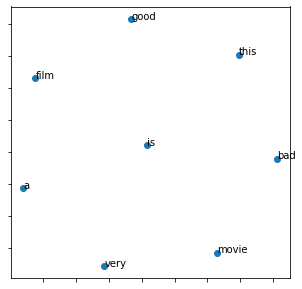

In [138]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理

コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [141]:
sentences = [make_word(sentence) for sentence in x_train]
sentences

[['zero',
  'day',
  'leads',
  'you',
  'to',
  'think',
  'even',
  're-think',
  'why',
  'two',
  'boys',
  'and',
  'young',
  'men',
  'would',
  'do',
  'what',
  'they',
  'did',
  '-',
  'commit',
  'mutual',
  'suicide',
  'via',
  'slaughtering',
  'their',
  'classmates',
  'it',
  'captures',
  'what',
  'must',
  'be',
  'beyond',
  'a',
  'bizarre',
  'mode',
  'of',
  'being',
  'for',
  'two',
  'humans',
  'who',
  'have',
  'decided',
  'to',
  'withdraw',
  'from',
  'common',
  'civility',
  'in',
  'order',
  'to',
  'define',
  'their',
  'own',
  'and',
  'mutual',
  'world',
  'via',
  'coupled',
  'destructionit',
  'is',
  'not',
  'a',
  'perfect',
  'movie',
  'but',
  'given',
  'what',
  'money',
  'and',
  'time',
  'the',
  'filmmaker',
  'and',
  'actors',
  'had',
  '-',
  'it',
  'is',
  'a',
  'remarkable',
  'product',
  'in',
  'terms',
  'of',
  'explaining',
  'the',
  'motives',
  'and',
  'actions',
  'of',
  'the',
  'two',
  'young',
  'suic

# 【問題6】Word2Vecの学習

In [143]:
model = Word2Vec(min_count=15, size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(20121907, 28782020)

In [146]:
for i in model.most_similar('dog'):
    print(i)

('bed', 0.9681380391120911)
('hospital', 0.9602933526039124)
('truck', 0.9400433301925659)
('jail', 0.9377403855323792)
('tree', 0.9376629590988159)
('gun', 0.9335546493530273)
('phone', 0.9315131902694702)
('neck', 0.9309521913528442)
('horse', 0.9264699220657349)
('demon', 0.9256268739700317)


/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [148]:
for i in model.most_similar(positive='life',negative='happyness'):
    print(i)

('laugh', 0.6707703471183777)
('you', 0.6355608701705933)
('all', 0.6066388487815857)
('lot', 0.590656042098999)
('avoid', 0.5899295806884766)
('feeling', 0.5876084566116333)
('spoilers', 0.5806765556335449)
('even', 0.5790380239486694)
('fun', 0.5734131336212158)
('something', 0.5702189207077026)


/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
